In [5]:
%matplotlib inline
import requests
from bs4 import BeautifulSoup
import time
import pandas as pd
import random
import matplotlib as plt
from lxml import html

#https://www.tripadvisor.com/Restaurants-g293986-Amman_Amman_Governorate.html
"""
soup.find_all('a', {'class':'property_title'})
soup.find_all('span', {'class':'reviewCount'})
soup.find_all('div', {'class':'popIndex rebrand popIndexDefault'}) ranking
soup.find_all('span', {'class':'item price'})
soup.find_all('a', {'class':'item cuisine'})

"""
                          
property_titles = []
review_count = []
rankings = []
prices = []
cuisines = []
url2 = []
latitude = []
longitude = []

for offset in range(0, 19):
    url = 'https://www.tripadvisor.com/Restaurants-g293986-oa' + str(offset) + '-Amman_Amman_Governorate.html#EATERY_OVERVIEW_BOX'

    r = requests.get(url)
#    soup = BeautifulSoup(r.text, "html.parser")
    time.sleep(0.05)
    soup = BeautifulSoup(r.text,"lxml")
#    li = soup.find_all('div', {'id':'EATERY_SEARCH_RESULTS'}) # all restaurants in listing
    
#    for restaurant in soup.find_all(')
    for link in soup.find_all('a', {'class':'property_title'}):
        title = link.text
        property_titles.append(title.strip('\n'))
        
    for link in soup.find_all('span', {'class':'reviewCount'}):
        count = link.text
        count = count.strip(' reviews\n')
        count = count.replace(',', '')
        review_count.append(int(count))
        
    for link in soup.find_all('div', {'class':'popIndex rebrand popIndexDefault'}):
        rank = link.text
        rankings.append(rank.strip('\n'))
        
    # some restaurants don't have a price, have to figure this out
    for link in soup.find_all('span', {'class':'item price'}):
        price = link.text
        prices.append(price.strip('\n'))
       
    # this isn't really working as of now -- it collects all cuisine tags, not just one for each restaurant
    #for link in soup.find_all('a', {'class':'item cuisine'}):
        #cuisine = link.text
        #print(cuisine)
        #cuisines.append(cuisine.strip('\n'))
        
    
    #for this I am not sure what you were thinking about it, but what if we take all of the tag cuisines 
    #for each restaurant as a restaurant may be in more than one category and then perhaps use these also for 
    #clustering or anything ?? 
    
    
    t = []
    for link in soup.find_all('div', {'class':'cuisines'}):
        for k in link.find_all('a',{'class':'item cuisine'}):
            if len(t) < 1:
                t.append(k.text)
        cuisines.append(''.join(t))
        t = []

    #added url so that we can use these links to move through all the pages in tripadvisor_restaurant.py 
    # "https://tripadvisor.com/ + url_of_rest
    for link in soup.find_all('a',{'class':'property_title'}):
        url_of_rest = link['href']
        url2.append(url_of_rest.strip('\n'))

        
input_file = open('links.csv', 'r')
base_url = "https://www.tripadvisor.com"
for line in input_file:
    url = line
    restaurant_url = base_url + url
    response = requests.get(restaurant_url).text
    parser = html.fromstring(response)
    XPATH_LATITUDE = '//div[@class="mapContainer"]//@data-lat'
    XPATH_LONGITUDE = '//div[@class="mapContainer"]//@data-lng'
    raw_latitude = parser.xpath(XPATH_LATITUDE)
    raw_longitude = parser.xpath(XPATH_LONGITUDE)
    lat = ' '.join(' '.join(raw_latitude).split()) if raw_latitude else None
    long = ' '.join(' '.join(raw_longitude).split()) if raw_longitude else None
    latitude.append(lat)
    longitude.append(long)
        

columns = {'property_title':property_titles, 'latitude':latitude, 'longitude':longitude, 'review_count':review_count, 'url2':url2, 'ranking':rankings, 'cuisines':cuisines}
df = pd.DataFrame(columns)
df

,cuisines,latitude,longitude,property_title,ranking,review_count,url2
0,Pizza,31.963032,35.89816,Pizza Roma Cafe,#1 of 545 Restaurants in Amman,300,/Restaurant_Review-g293986-d3389330-Reviews-Pi...
1,American,31.952438,35.937958,Brisket,#2 of 545 Restaurants in Amman,268,/Restaurant_Review-g293986-d7267482-Reviews-Br...
2,Middle Eastern,31.951878,35.9332,Habibah Sweets,#3 of 545 Restaurants in Amman,665,/Restaurant_Review-g293986-d2084697-Reviews-Ha...
3,Lebanese,31.952278,35.92017,Fakhreldin Restaurant,#4 of 545 Restaurants in Amman,787,/Restaurant_Review-g293986-d1371269-Reviews-Fa...
4,Mediterranean,31.94924,35.929058,Sufra Restaurant,#5 of 545 Restaurants in Amman,701,/Restaurant_Review-g293986-d2406112-Reviews-Su...
5,Lebanese,31.961784,35.8701,Tawaheen al-Hawa,#6 of 545 Restaurants in Amman,713,/Restaurant_Review-g293986-d1641029-Reviews-Ta...
6,American,31.992243,35.866783,Chestnut Restaurant & Pub,#7 of 545 Restaurants in Amman,283,/Restaurant_Review-g293986-d7761403-Reviews-Ch...
7,Steakhouse,31.952156,35.91342,V Lounge & Restaurant,#8 of 545 Restaurants in Amman,57,/Restaurant_Review-g293986-d3989474-Reviews-V_...
8,Fast Food,31.952234,35.93188,Hashem,#9 of 545 Restaurants in Amman,1361,/Restaurant_Review-g293986-d1918356-Reviews-Ha...
9,Italian,31.98758,35.866676,Melograno,#10 of 545 Restaurants in Amman,83,/Restaurant_Review-g293986-d10005312-Reviews-M...


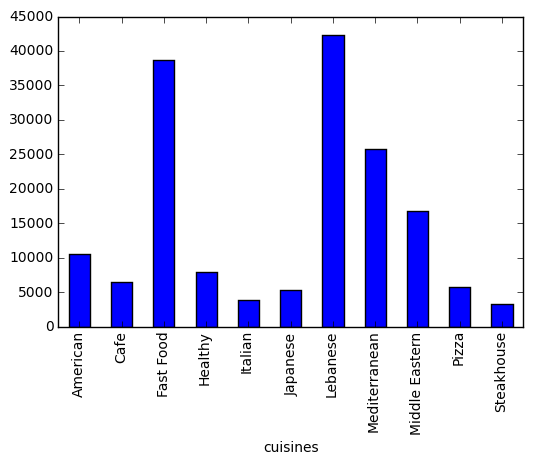

In [6]:
df2 = df[['cuisines', 'review_count']]
df2 = df2.groupby(['cuisines'])['review_count'].sum()
df2
df2.plot(kind="bar")

In [5]:
print(url2)

['/Restaurant_Review-g293986-d7267482-Reviews-Brisket-Amman_Amman_Governorate.html', '/Restaurant_Review-g293986-d3389330-Reviews-Pizza_Roma_Cafe-Amman_Amman_Governorate.html', '/Restaurant_Review-g293986-d2084697-Reviews-Habibah_Sweets-Amman_Amman_Governorate.html', '/Restaurant_Review-g293986-d1371269-Reviews-Fakhreldin_Restaurant-Amman_Amman_Governorate.html', '/Restaurant_Review-g293986-d2406112-Reviews-Sufra_Restaurant-Amman_Amman_Governorate.html', '/Restaurant_Review-g293986-d3989474-Reviews-V_Lounge_Restaurant-Amman_Amman_Governorate.html', '/Restaurant_Review-g293986-d1641029-Reviews-Tawaheen_al_Hawa-Amman_Amman_Governorate.html', '/Restaurant_Review-g293986-d7761403-Reviews-Chestnut_Restaurant_Pub-Amman_Amman_Governorate.html', '/Restaurant_Review-g293986-d1918356-Reviews-Hashem-Amman_Amman_Governorate.html', '/Restaurant_Review-g293986-d3261923-Reviews-Abu_Jbara-Amman_Amman_Governorate.html', '/Restaurant_Review-g293986-d10005312-Reviews-Melograno-Amman_Amman_Governorate.htm

In [22]:
len(url2)

570

In [7]:
import csv
with open('restaurants.csv', 'w') as csvfile:
    df.to_csv('restaurants.csv', sep='\t', encoding='utf-8')
    #df.to_csv(path_or_buf=None, sep=', ', na_rep='', float_format=None, columns=None, header=True, index=True, index_label=None, mode='w', encoding=None, compression=None, quoting=None, quotechar='"', line_terminator='\n', chunksize=None, tupleize_cols=False, date_format=None, doublequote=True, escapechar=None, decimal='.')
    #fieldnames = ['first_name', 'last_name']
    #writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
#df.to_csv(path_or_buf=None, sep=', ', na_rep='', float_format=None, columns=None, header=True, index=True, index_label=None, mode='w', encoding=None, compression=None, quoting=None, quotechar='"', line_terminator='\n', chunksize=None, tupleize_cols=False, date_format=None, doublequote=True, escapechar=None, decimal='.')

In [8]:
with open("links.csv", "w",newline="") as f:
    writer = csv.writer(f)
    for i in url2:
        writer.writerow([i])
    #writer = csv.writer(f, dialect='excel')
    #writer.writerows(url2)